In [4]:
pip install yfinance


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import yfinance as yf # type: ignore

In [6]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)

In [7]:
stock = "GOOG"
google_data = yf.download(stock, start,end)

[*********************100%%**********************]  1 of 1 completed


In [8]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-06,28.012093,28.456873,27.923336,28.241163,28.209063,26687069
2014-08-07,28.322241,28.416483,27.978186,28.090876,28.058947,22218835
2014-08-08,28.100849,28.434433,27.940788,28.360636,28.328400,29895854
2014-08-11,28.421469,28.446400,28.222515,28.316257,28.284071,24294518
2014-08-12,28.148718,28.217529,27.967216,28.059464,28.027569,30840441


In [9]:
google_data.shape

(2516, 6)

In [10]:
google_data.describe

<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-08-06   28.012093   28.456873   27.923336   28.241163   28.209063   
2014-08-07   28.322241   28.416483   27.978186   28.090876   28.058947   
2014-08-08   28.100849   28.434433   27.940788   28.360636   28.328400   
2014-08-11   28.421469   28.446400   28.222515   28.316257   28.284071   
2014-08-12   28.148718   28.217529   27.967216   28.059464   28.027569   
...                ...         ...         ...         ...         ...   
2024-07-30  171.830002  172.949997  170.119995  171.860001  171.860001   
2024-07-31  174.919998  175.910004  171.720001  173.149994  173.149994   
2024-08-01  171.979996  175.679993  170.509995  172.449997  172.449997   
2024-08-02  168.190002  170.210007  166.389999  168.399994  168.399994   
2024-08-05  157.369995  165.940002  156.600006  160.639999  160.639999   

   

In [11]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-08-06 to 2024-08-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [12]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Past ten years Closing Price of Google')

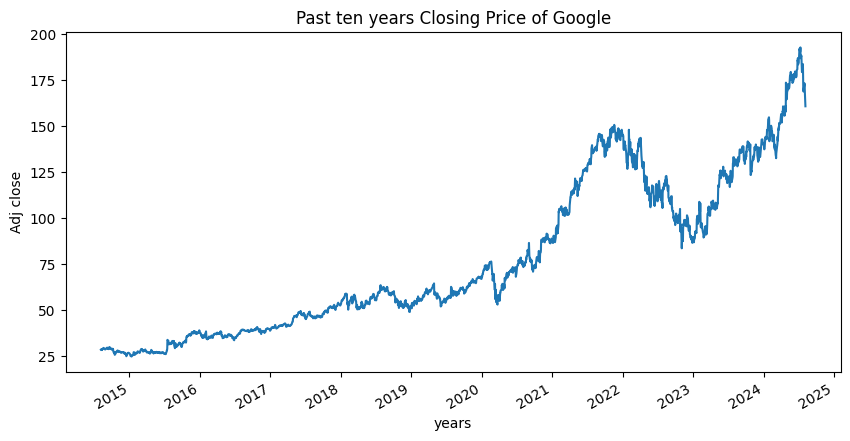

In [15]:
plt.figure(figsize=(10,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj close")
plt.title("Past ten years Closing Price of Google")

In [16]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize = figsize)
    values.plot()
    plt.xlabel("years")
    plt.ylabel("Adj close")
    plt.title(f"{column_name} of Google")

In [18]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

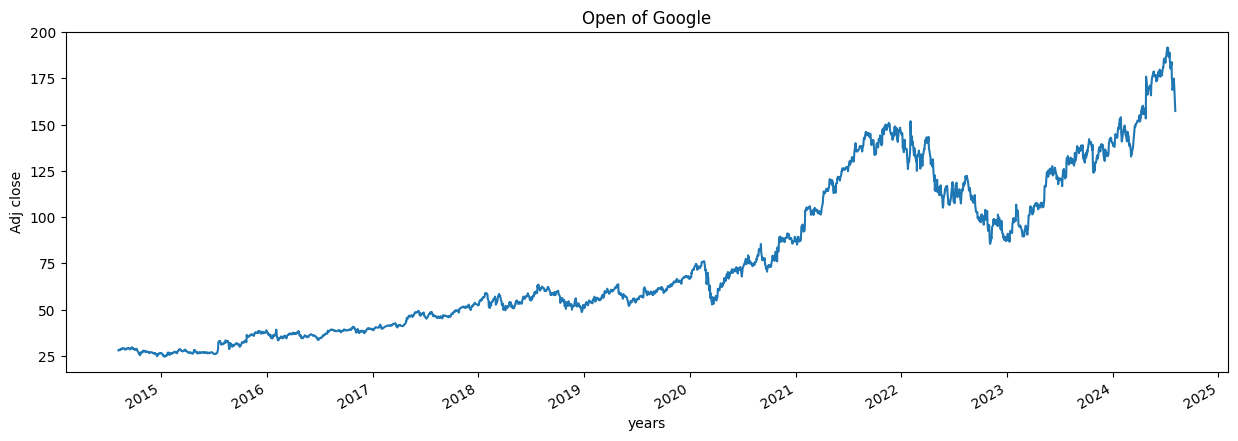

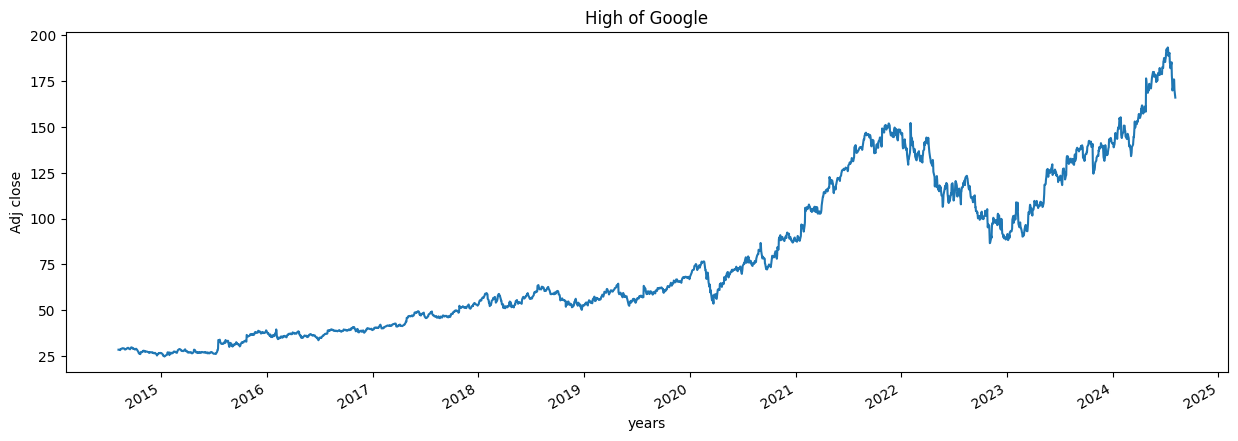

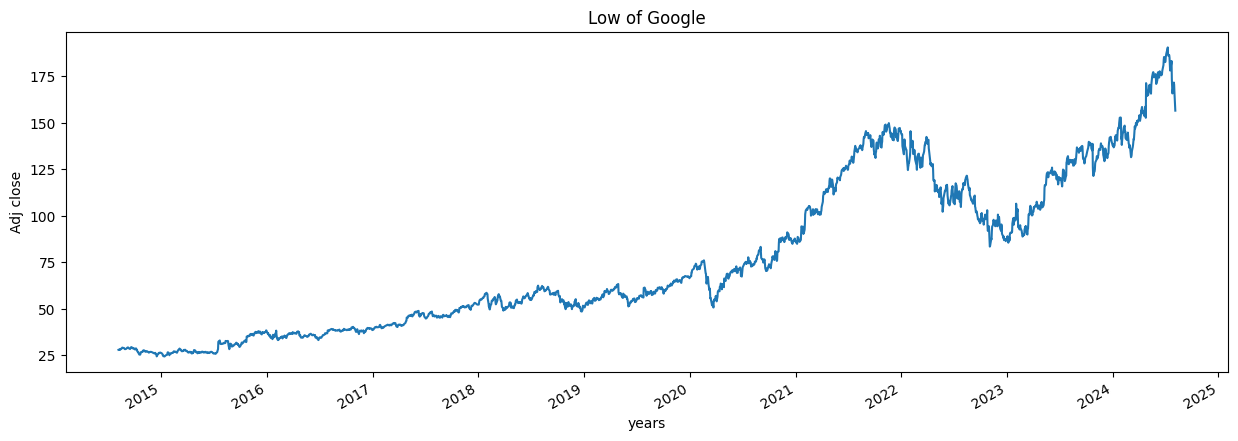

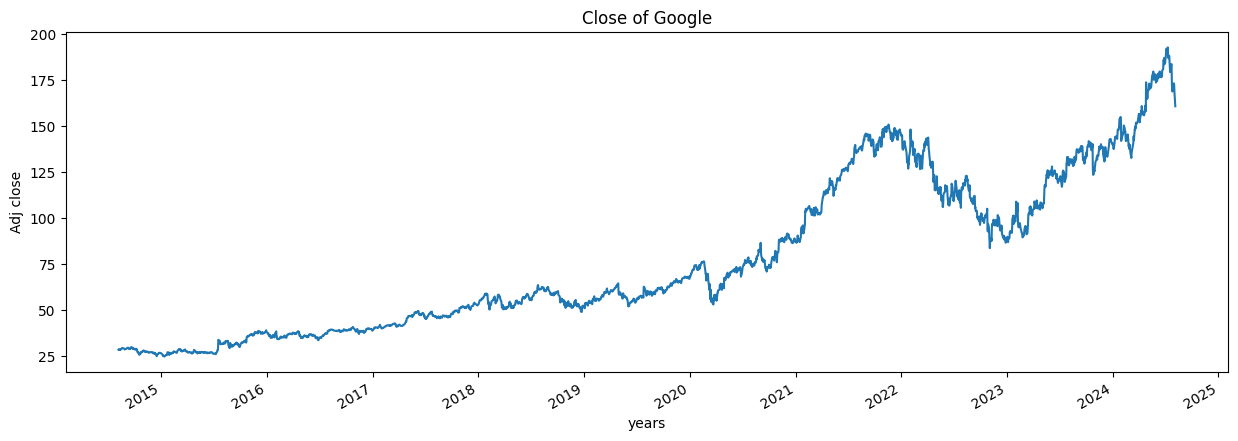

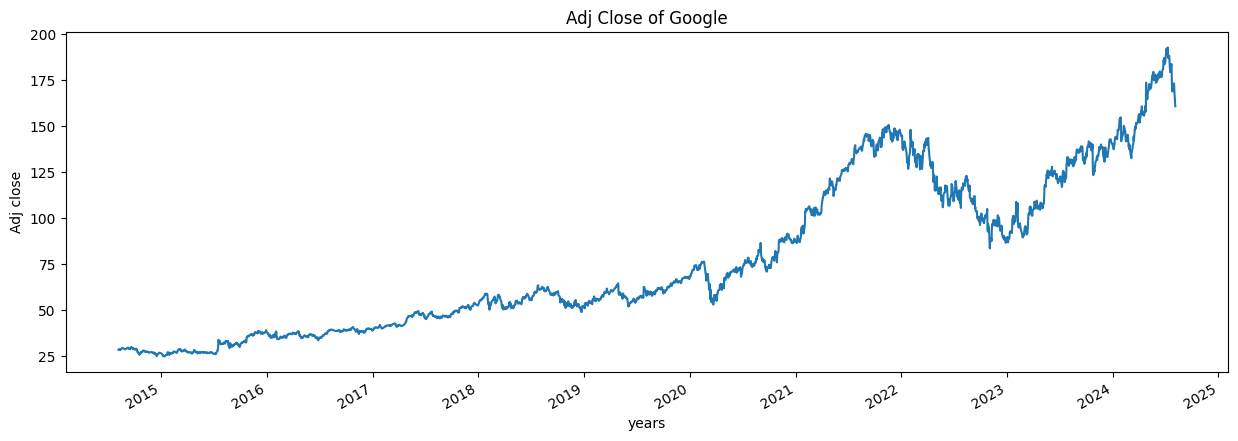

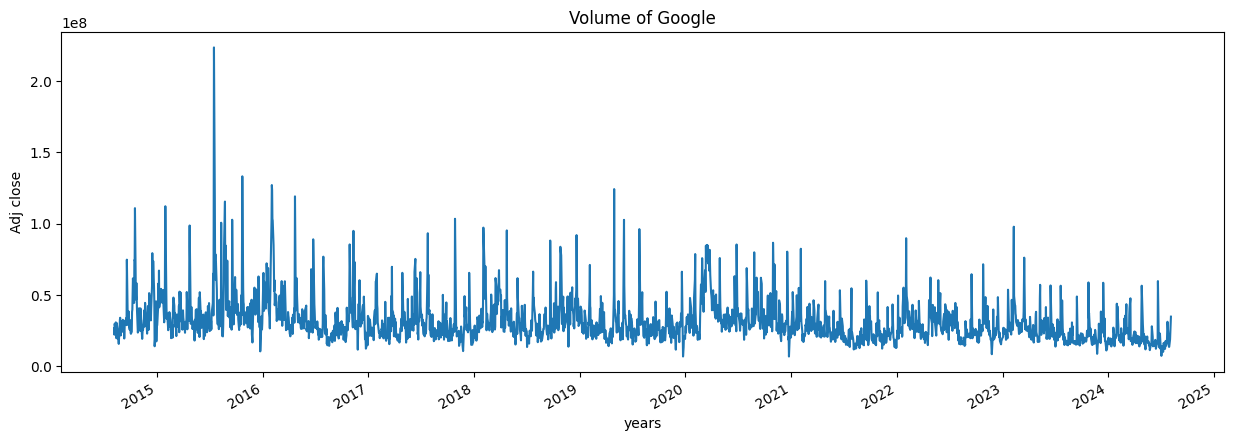

In [22]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [29]:
import pandas as pd

In [31]:
for i in range(2014, 2025):
    print(i,list(google_data.index.year).count(i))

2014 103
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 149


In [35]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [36]:
google_data['MA_for_250_days'][0:250].tail()

Date
2015-07-28          NaN
2015-07-29          NaN
2015-07-30          NaN
2015-07-31          NaN
2015-08-03    27.350234
Name: MA_for_250_days, dtype: float64

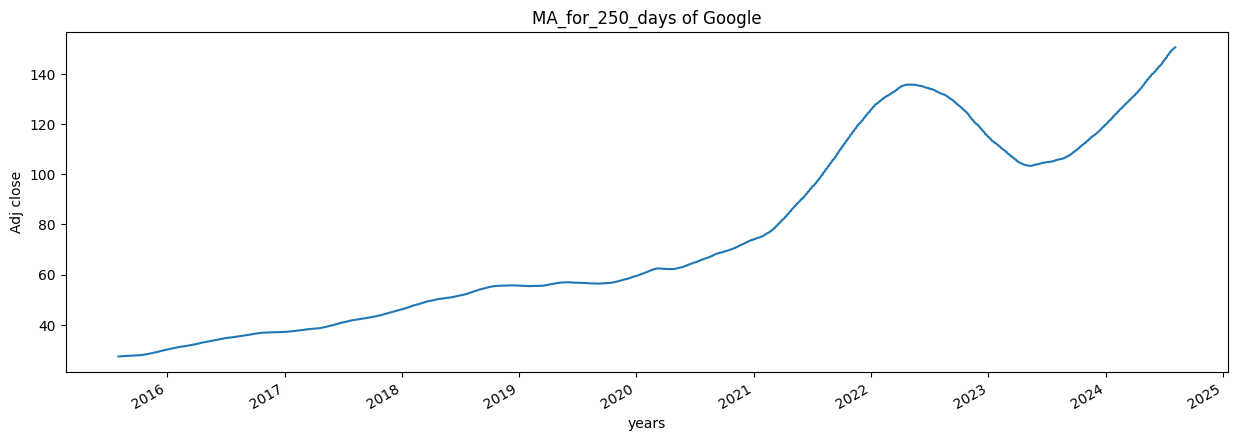

In [41]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

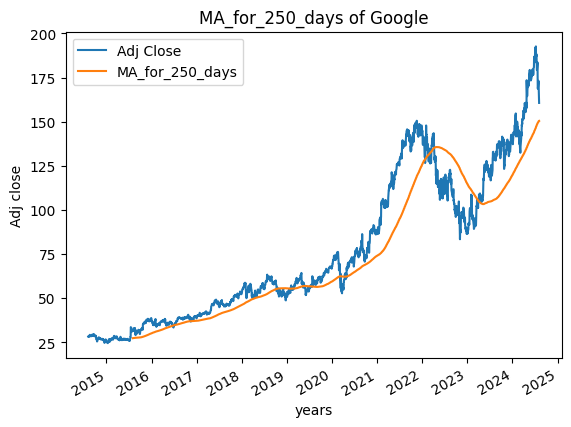

In [43]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')